# Simulación de perdida de poder de compra por inflación anual

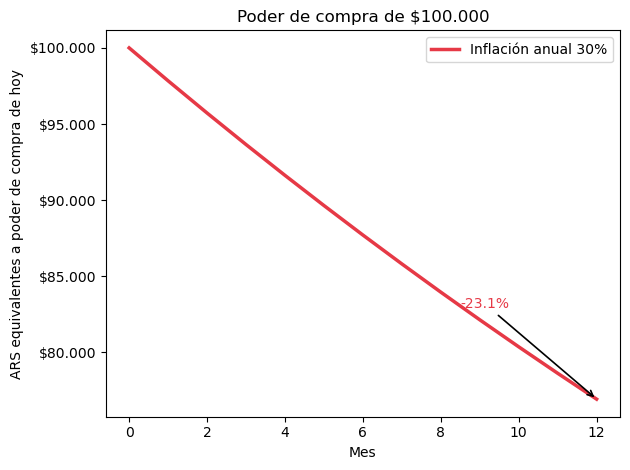

El poder de compra con una inflación proyectada de 30% se reduce en un 23.1% (de $100.000 a $76.923 en 12 meses).


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Parametros

monto_inicial = 100000
meses = 12
inflacion_anual = 0.30
color_linea = "#E63946"  

def anual_a_mensual(tea):
    return (1 + tea)**(1/12) - 1

def poder_compra_series(monto, infl_anual, meses):
    tem = anual_a_mensual(infl_anual)
    t = np.arange(meses + 1)
    factor_precio = (1 + tem)**t
    valor_real = monto / factor_precio
    return t, valor_real

# Serie

t, valor_real = poder_compra_series(monto_inicial, inflacion_anual, meses)

# Gráfico

fig, ax = plt.subplots()

ax.plot(t, valor_real, color=color_linea, linewidth=2.5, label="Inflación anual 30%")
ax.set_title("Poder de compra de $100.000")
ax.set_xlabel("Mes")
ax.set_ylabel("ARS equivalentes a poder de compra de hoy")

# Formato AR para $ en eje Y (punto como separador de miles)

def ars_fmt(x, pos):
    return "$" + f"{int(round(x)):,.0f}".replace(",", ".")
ax.yaxis.set_major_formatter(FuncFormatter(ars_fmt))

# Etiqueta final

pct_restante = valor_real[-1] / monto_inicial * 100
caida_pct = 100 - pct_restante
ax.annotate(f"-{caida_pct:.1f}%",
            xy=(meses, valor_real[-1]),
            xytext=(meses - 3.5, valor_real[-1] + (valor_real[0]*0.06)),
            color=color_linea,
            arrowprops=dict(arrowstyle="->", color="black", lw=1.2))

ax.legend()
fig.tight_layout()
plt.show()

# Resumen

final_ars = int(round(valor_real[-1]))
final_ars_fmt = f"${final_ars:,.0f}".replace(",", ".")
inicial_fmt = f"${monto_inicial:,.0f}".replace(",", ".")

print(f"El poder de compra con una inflación proyectada de 30% se reduce en un {caida_pct:.1f}% "
      f"(de {inicial_fmt} a {final_ars_fmt} en 12 meses).")

